In [2]:
from fmskill import ModelResult, PointObservation, TrackObservation, Connector
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Model Results

In [4]:
fn = r"..\tests\testdata\SW\CMEMS_DutchCoast_2017-10-28.nc"
mr1 = ModelResult(fn, name='CMEMS', item='VHM0')
mr1

<XArrayModelResultItem> 'CMEMS'
- Item: VHM0

In [5]:
fn = r"..\tests\testdata\SW\CMEMS_DutchCoast_2017-10-29.nc"
mr2 = ModelResult(fn, name='CMEMS', item='VHM0')
mr2

<XArrayModelResultItem> 'CMEMS'
- Item: VHM0

## Connect and extract

(<AxesSubplot:>, <AxesSubplot:>)

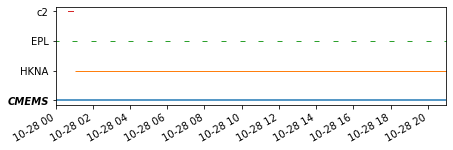

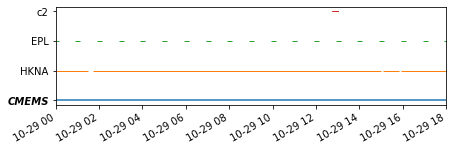

In [12]:
con1 = Connector([o1,o2,o3],mr1)
con2 = Connector([o1,o2,o3],mr2)
con1.plot_temporal_coverage(), con2.plot_temporal_coverage();

In [7]:
cc1 = con1.extract()
cc2 = con2.extract()

In [16]:
cc = cc1 + cc2
print(f"cc1: start={cc1.start}, end={cc1.end}, n_points={cc1.n_points}")
print(f"cc2: start={cc2.start}, end={cc2.end}, n_points={cc2.n_points}")
print(f"cc : start={cc.start}, end={cc.end}, n_points={cc.n_points}")

cc1: start=2017-10-28 00:00:00, end=2017-10-28 21:00:00, n_points=142
cc2: start=2017-10-29 00:00:00, end=2017-10-29 18:00:00, n_points=247
cc : start=2017-10-28 00:00:00, end=2017-10-29 18:00:00, n_points=389
